<a href="https://colab.research.google.com/github/Electromagneticradiation/cosmic-classifier/blob/main/cosmicclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Installationt

!pip install pytorch-tabnet
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 860.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [24]:
# Importing and Intial setup

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.impute import SimpleImputer #what
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Data Analysis

df = pd.read_csv('/content/drive/MyDrive/cosmicclassifierTraining.csv')
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
print(df.nunique())

   Atmospheric Density  Surface Temperature   Gravity  Water Content  \
0             0.472806                  NaN -0.313872      -2.089299   
1             4.180154            -1.157515  2.430956      -1.595850   
2            -0.129008             1.621592 -0.785741       2.081196   
3            -3.122000            -2.299818  1.072092       0.353524   
4            -1.459426             2.890268  0.148757      -0.804439   

   Mineral Abundance  Orbital Period  Proximity to Star  \
0          -0.152201       -0.885649           0.900105   
1          -3.188678       -0.609434          -0.199828   
2          -1.413796       -0.095152          -3.502577   
3          -0.192529        2.917067          -1.972329   
4           0.494875        0.044910          -0.438796   

   Magnetic Field Strength  Radiation Levels  Atmospheric Composition Index  \
0                      NaN               6.0                       0.692907   
1                      9.0               9.0          

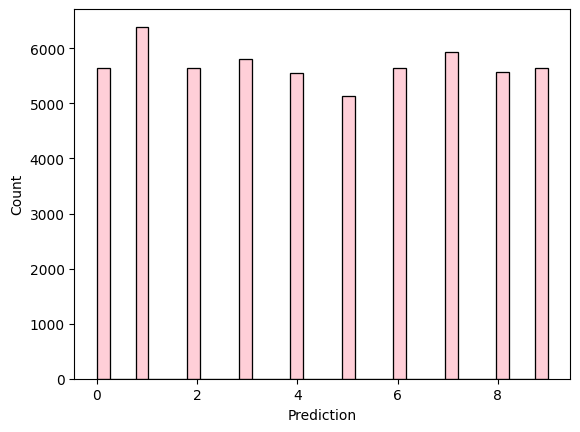

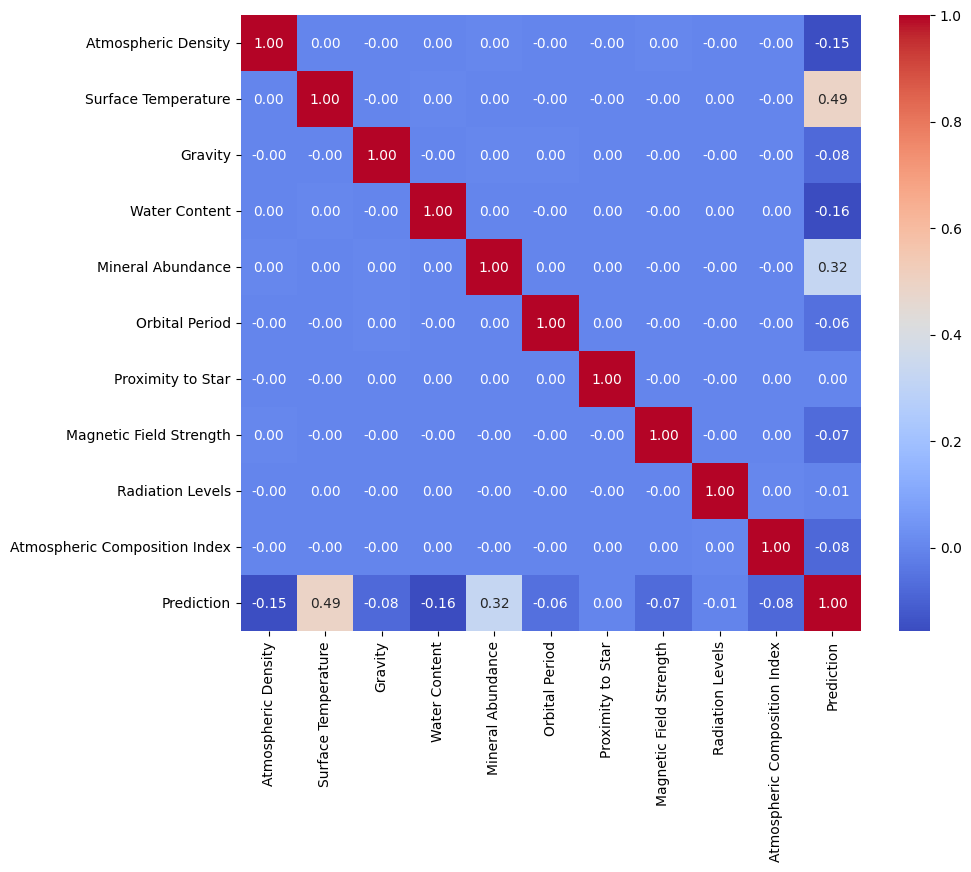

In [26]:
# Visual Data Analayis

sb.histplot(df['Prediction'],color='pink')
plt.show()
print("\n")

# To convert objects into float
df['Magnetic Field Strength'] = df['Magnetic Field Strength'].astype(str).str.extract('(\d+)').astype(float)
df.to_csv('/content/drive/MyDrive/cosmicclassifierTraining.csv',index=False)
df['Radiation Levels'] = df['Radiation Levels'].astype(str).str.extract('(\d+)').astype(float)
df.to_csv('/content/drive/MyDrive/cosmicclassifierTraining.csv',index=False)

# Correlation Analysis
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [29]:
# Preprocessing

# Removing null value rows
df = df.dropna()

# I/O segregation and conversion into numpy array
x = df.drop(['Prediction'],axis=1)
y = df['Prediction']
x = x.values
y = y.values

# Splitting into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [30]:
tabnet = TabNetClassifier()
tabnet.fit(
    x_train, y_train,
    eval_set = [(x_test,y_test)],
    max_epochs = 50,
    patience = 10,
    batch_size = 1024,
    virtual_batch_size = 128

)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.86627 | val_0_accuracy: 0.58368 |  0:00:02s
epoch 1  | loss: 1.02006 | val_0_accuracy: 0.7409  |  0:00:03s
epoch 2  | loss: 0.74623 | val_0_accuracy: 0.77995 |  0:00:05s
epoch 3  | loss: 0.62765 | val_0_accuracy: 0.82516 |  0:00:06s
epoch 4  | loss: 0.56081 | val_0_accuracy: 0.83294 |  0:00:07s
epoch 5  | loss: 0.51198 | val_0_accuracy: 0.84469 |  0:00:09s
epoch 6  | loss: 0.47647 | val_0_accuracy: 0.85555 |  0:00:11s
epoch 7  | loss: 0.44667 | val_0_accuracy: 0.86509 |  0:00:13s
epoch 8  | loss: 0.43014 | val_0_accuracy: 0.86744 |  0:00:14s
epoch 9  | loss: 0.42034 | val_0_accuracy: 0.87155 |  0:00:15s
epoch 10 | loss: 0.39565 | val_0_accuracy: 0.87816 |  0:00:17s
epoch 11 | loss: 0.37937 | val_0_accuracy: 0.88139 |  0:00:18s
epoch 12 | loss: 0.38282 | val_0_accuracy: 0.8805  |  0:00:20s
epoch 13 | loss: 0.35921 | val_0_accuracy: 0.88506 |  0:00:21s
epoch 14 | loss: 0.35883 | val_0_accuracy: 0.88417 |  0:00:23s
epoch 15 | loss: 0.35466 | val_0_accuracy: 0.88652 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [35]:
y_pred = tabnet.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9094245449207281
